
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [2]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

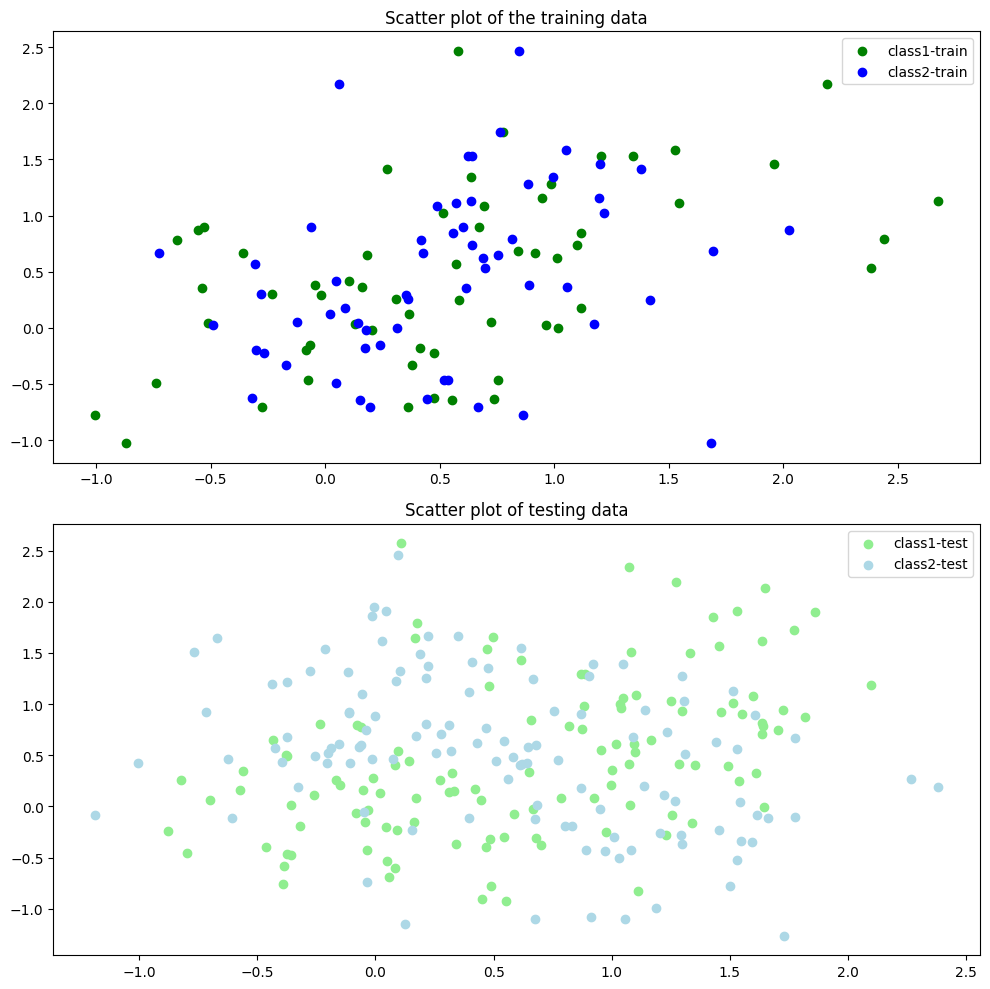

In [3]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1= [0, 0]
mean2= [0, 1]  #class2
mean3= [1, 0]  #class2
mean4= [1, 1]
cov= [[0.3, 0], [0, 0.3]]

#Sample data points from the bivariate Gaussian distribution

x1 = np.random.multivariate_normal(mean1, cov, 90)
x2 = np.random.multivariate_normal(mean2, cov, 90)
x3 = np.random.multivariate_normal(mean3, cov, 90)
x4 = np.random.multivariate_normal(mean4, cov, 90)

#Generate training data
X_train = np.vstack((x1[:30], x2[:30], x3[:30], x4[:30]))
s = (30, 2)
y1 = np.ones((s), dtype = int)
y2 = -1 * np.ones((s), dtype = int)
y3 = -1 * np.ones((s), dtype = int)
y4 = np.ones((s), dtype = int)
Y_train = np.vstack((y1, y2, y3, y4))




#Generate testing data
X_test = np.vstack((x1[30:90], x2[30:90], x3[30:90], x4[30:90]))
s = (60, 2)
y1 = np.ones((s), dtype = int)
y2 = -1 * np.ones((s), dtype = int)
y3 = -1 * np.ones((s), dtype = int)
y4 = np.ones((s), dtype = int)
Y_test = np.vstack((y1, y2, y3, y4))

#Visualize the data using plt.scatter() function
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
axes[0].scatter([X_train[i, 0] for i in range(len(Y_train)) if Y_train[i][0] == 1], [X_train[i, 1] for i in range(len(Y_train)) if Y_train[i][0] == 1], color = 'green', label = 'class1-train')
axes[0].scatter([X_train[i, 0] for i in range(len(Y_train)) if Y_train[i][0] == -1], [X_train[i, 1] for i in range(len(Y_train)) if Y_train[i][0] == 1], color = 'blue', label = 'class2-train')
axes[1].scatter([X_test[i, 0] for i in range(len(Y_test)) if Y_test[i][0] == 1], [X_test[i, 1] for i in range(len(Y_test)) if Y_test[i][0] == 1], color = 'lightgreen', label = 'class1-test')
axes[1].scatter([X_test[i, 0] for i in range(len(Y_test)) if Y_test[i][0] == -1], [X_test[i, 1] for i in range(len(Y_test)) if Y_test[i][0] == -1], color = 'lightblue', label = 'class2-test')
axes[0].set_title('Scatter plot of the training data')
axes[1].set_title('Scatter plot of testing data')
axes[0].legend()
axes[1].legend()
plt.tight_layout()
plt.show()

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

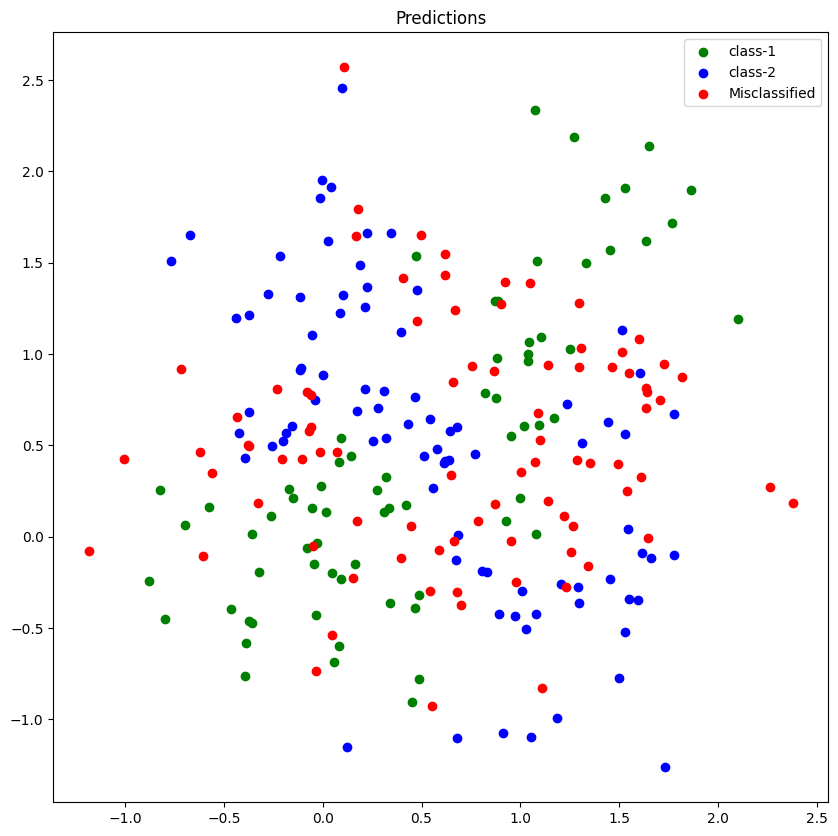

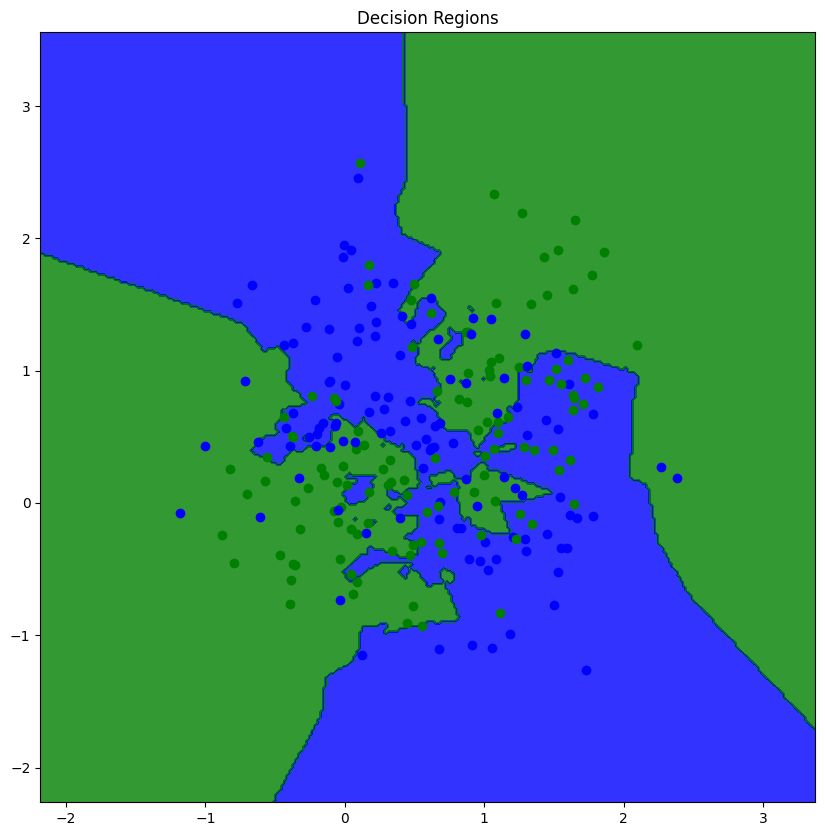

In [4]:
########################################
#Part(b) #KNN classification
########################################
#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  predictions = []
  for i in range(len(X_test)):
      distances = []
      for j in range (len(X_train)):
        distances.append(np.linalg.norm(X_test[i] - X_train[j]))
      distances = np.array(distances)
      indexes = []
      for i in range(k):
        min = np.argmin(distances)
        distances[min] = np.inf
        indexes.append(min)

      class1 = np.sum(Y_train[indexes] == 1)
      class2 = np.sum(Y_train[indexes] == -1)

      if class1 > class2:
        final_class = 1
      else:
        final_class = -1
      predictions.append(final_class)
  return predictions

predictions = kNNClassify(X_train,Y_train,X_test,3)

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  count = 0
  for i in range(len(pred)):
    # print("hello")
    if true[i][0] == pred[i] :
      count += 1
  return count/len(true)

# Create Visual Representation of Predictions
plt.figure(figsize=(10, 10))
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == 1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == 1)], color = "green", label = "class-1")
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == -1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == -1)], color = "blue", label = "class-2")
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i])], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i])], color = "red", label = "Misclassified")
plt.title("Predictions")
plt.legend()

# Plotting decision regions
h = .02

x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


mesh_predictions = kNNClassify(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()], 3)
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)


plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, mesh_predictions, colors = ["blue", "green"] , alpha=0.8)
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == 1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == 1)], color = "green", label = "class-1")
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == -1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] == predictions[i] and predictions[i] == -1)], color = "blue", label = "class-2")
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i] and predictions[i] == 1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i] and predictions[i] == 1)], color = "blue", label = "Misclassified")
plt.scatter([X_test[i, 0] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i] and predictions[i] == -1)], [X_test[i, 1] for i in range(len(Y_test)) if (Y_test[i][0] != predictions[i] and predictions[i] == -1)], color = "green", label = "Misclassified")
plt.title("Decision Regions")
plt.show()





<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.


best value of k =  5


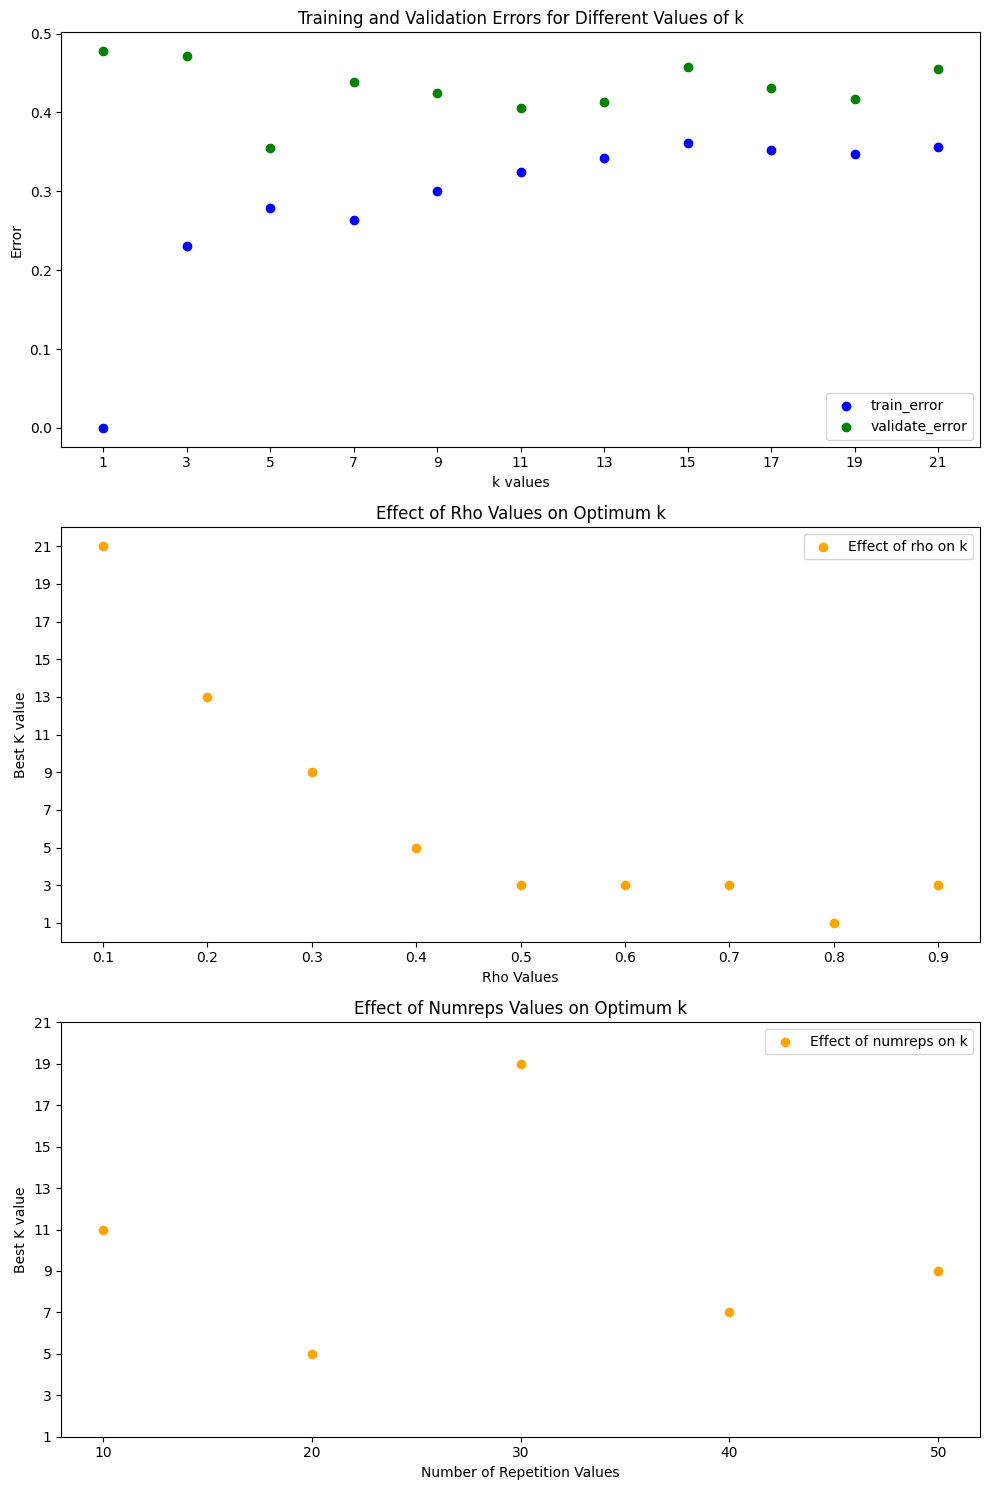

0.6875


In [5]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  k_value_error_train = []
  k_value_error_validate = []

  for i in k_range:
    train_error_list = []
    validate_error_list = []
    for j in range(numrep):
      index = np.random.permutation(len(X_train))
      split = int(rho * len(X_train))
      fraction1 = index[split:]
      fraction2 = index[:split]
      train = X_train[fraction1]
      validate = X_train[fraction2]
      train_label = Y_train[fraction1]
      validate_label = Y_train[fraction2]
      predictions_train = kNNClassify(train, train_label, train, i)
      predictions_validate = kNNClassify(train, train_label, validate, i)

      error_train = 1 - KNNAccuracy(train_label, predictions_train)
      error_validate = 1 - KNNAccuracy(validate_label, predictions_validate)

      train_error_list.append(error_train)
      validate_error_list.append(error_validate)

    mean_error_train = np.mean(train_error_list)
    mean_error_validate = np.mean(validate_error_list)
    k_value_error_train.append(mean_error_train)
    k_value_error_validate.append(mean_error_validate)

  return k_value_error_train, k_value_error_validate



error_on_train = []
error_on_validate = []
#Return errors on training and validation data
numrep = 10
rho = 0.3


k_values = list(range(1, 22, 2))  # Example: k values from 1 to 21

error_on_train, error_on_validate = holdoutCVkNN(k_values, numrep, rho)


#what is the best value for k?
index = np.argmin(error_on_validate)
k_best = k_values[index]

print("best value of k from cross validation = ", k_best)

#Effect of rho and number repetations on k

#Effect of rho
best_k_rho = []
rho_values = [round((0.1*i),2) for i in range (1, 10, 1)]
for rho_test in rho_values:
  error_on_train_rho, error_on_validate_rho = holdoutCVkNN(k_values, numrep, rho_test)
  index_rho = np.argmin(error_on_validate_rho)
  k_best_rho = k_values[index_rho]
  best_k_rho.append(k_best_rho)



#Effect of num_reps
best_k_numreps = []
numreps_values = [i for i in range(10, 60, 10)]
for reps in numreps_values:
  error_on_train_reps, error_on_validate_reps = holdoutCVkNN(k_values, reps, rho)
  index_reps = np.argmin(error_on_validate_reps)
  k_best_reps = k_values[index_reps]
  best_k_numreps.append(k_best_reps)


# Merge the three plots into 3 subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot training and validation errors for different values of k
axes[0].scatter(k_values, error_on_train, color='blue', label='train_error')
axes[0].scatter(k_values, error_on_validate, color='green', label='validate_error')
axes[0].set_xticks(k_values)
axes[0].set_title('Training and Validation Errors for Different Values of k')
axes[0].set_xlabel('k values')
axes[0].set_ylabel('Error')
axes[0].legend()

# Plot the effect of rho on the best k
axes[1].scatter(rho_values, best_k_rho, color='orange', label='Effect of rho on k')
axes[1].set_xticks(rho_values)
axes[1].set_yticks(k_values)
axes[1].set_xlabel('Rho Values')
axes[1].set_ylabel('Best K value')
axes[1].set_title('Effect of Rho Values on Optimum k')
axes[1].legend()

# Plot the effect of num_reps on the best k
axes[2].scatter(numreps_values, best_k_numreps, color='orange', label='Effect of numreps on k')
axes[2].set_xticks(numreps_values)
axes[2].set_yticks(k_values)
axes[2].set_xlabel('Number of Repetition Values')
axes[2].set_ylabel('Best K value')
axes[2].set_title('Effect of Numreps Values on Optimum k')
axes[2].legend()

plt.tight_layout()
plt.show()




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
best_k_predictions = kNNClassify(X_train, Y_train, X_test, k_best)
accuracy = KNNAccuracy(Y_test, best_k_predictions)
print("Accuracy on Test Set = ", accuracy)





### Question 5:
*How would you now answer the question "what is the best value for k"?*

**Answer:**

**Locating the Optimal k:**
Following is a procedure to determine optimal k value:
- *Underfitting:*
  - If both training and validation errors are high, it suggests the model is too simple (high bias).
  - To address underfitting, consider reducing k to increase model complexity.

- *Overfitting:*
  - If the validation error increases while the training error decreases, the model is likely overfitting (high variance).
  - To mitigate overfitting, opt for a simpler model by increasing k.

- *Optimal value of k :*
  - Identify the point where the validation error is minimal.
  - This point represents the optimal balance between bias and variance.
  - The goal is to find a k value that generalizes well to new, unseen data.


**Iterative Approach:**
1. Start with a range of k values, including both small and large values.
2. Evaluate the performance on the training and validation sets for each k.
3. Visualize the error trends to identify the optimal zone.
4. Choose the k value associated with the lowest validation error.

**Importance of Optimal k:**
- The optimal k minimizes errors and enhances the model's ability to generalize.
- It prevents underfitting (oversimplification) and overfitting (overly complex models).
- Experiment with different k values to understand the model's sensitivity to neighborhood size.

**Final Note:**
Selecting the optimal k involves a balance between model simplicity and complexity, ensuring robustness across diverse datasets.


### Question 6:
*How is the value of k affected by ρ (percentage of points held out) and the number of repetitions? What does a large number of repetitions provide?*

**Answer:**
- **Effect of ρ (percentage of points held out):**
  - A higher value of ρ (e.g., 0.3) implies a larger validation set, leading to a more robust estimate of the model's performance. However, it may result in increased computational cost.
  - The choice of k can be influenced by the size of the validation set. A larger validation set may lead to a smoother curve in the error plot, making it easier to identify the optimal k.
  - The graph depicting the relationship between ρ and the optimum k values shows a decreasing trend. This indicates that, as the percentage of points held out (ρ) increases, the optimal value of k tends to decrease. It suggests that a larger validation set favors smaller values of k for achieving better generalization.

**Effect of numrep on the Choice of k in KNN**

**Observations:**
No noticeable trend is observed when altering the value of `numrep`. The selection of `k` appears to fluctuate inconsistently. There is no clear indication of a monotonic increase or decrease. At times, the value remains relatively constant.

### Question 7:
*Apply the model obtained by cross-validation (i.e., the best k) to the test set and check if there is an improvement in the classification error over the result of Part 2.*

**Answer:**
Applying the model obtained through cross-validation to the test set is a crucial step to assess its generalization performance on unseen data. In this case, the best k value determined through cross-validation is utilized for classification.

Upon evaluating the model on the test set, it is observed that the classification accuracy decreased compared to the results obtained in Part 2. This decrease in accuracy suggests that the selected hyperparameter (k) might not be optimal for the test data, or the model might be sensitive to variations in the test set. It is important to note that while cross-validation aids in choosing hyperparameters that perform well on the validation set, the performance on the test set is the ultimate metric for assessing the model's real-world applicability.

The decrease in accuracy could be attributed to the inherent variability present in the test set, and it emphasizes the importance of considering different aspects of the dataset when optimizing hyperparameters. Additionally, it highlights the need for caution in hyperparameter tuning, as the selected values may not always lead to improved generalization across all datasets.

In conclusion, the comparison between the results of Part 2 and the cross-validated model on the test set indicates a decrease in accuracy. This observation underscores the significance of robust evaluation methodologies and the need for careful consideration of hyperparameters in the context of the specific dataset at hand.


<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.


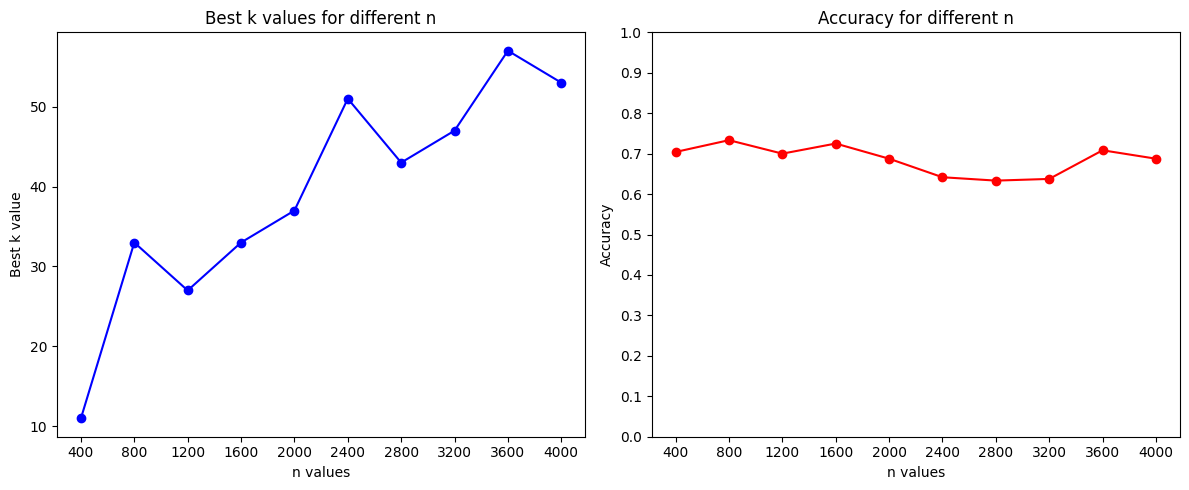

Accuracy for Difficult dataset  with its optimum k value is: 57.49999999999999


In [15]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
n_values = [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600, 4000 ]
k_best_n = []
accuracy_n = []
for n_value in n_values:
    x1_n = np.random.multivariate_normal(mean1, cov, 3*n_value//4)
    x2_n = np.random.multivariate_normal(mean2, cov, 3*n_value//4)
    x3_n = np.random.multivariate_normal(mean3, cov, 3*n_value//4)
    x4_n = np.random.multivariate_normal(mean4, cov, 3*n_value//4)

    X_train_n = np.vstack((x1_n[:n_value//4], x2_n[:n_value//4], x3_n[:n_value//4], x4_n[:n_value // 4]))
    s = (n_value//4, 2)
    y1_n = np.ones((s), dtype = int)
    y2_n = -1 * np.ones((s), dtype = int)
    y3_n = -1 * np.ones((s), dtype = int)
    y4_n = np.ones((s), dtype = int)
    Y_train_n = np.vstack((y1_n, y2_n, y3_n, y4_n))

    numrep_n = 10
    rho_n = 0.3
    k_values_n = []

    for i in range((int((n_value**0.5))- 10), (int((n_value**0.5))+ 10), 1):
        if i %2 != 0 and i > 0:
            k_values_n.append(i)
    error_on_train_n, error_on_validate_n = holdoutCVkNN(k_values_n, numrep_n, rho_n)

    index_n = np.argmin(error_on_validate_n)
    # print(k_values_n[index_n], n_value)
    k_best_n.append(k_values_n[index_n])
    best_k_predictions = kNNClassify(X_train_n, Y_train_n, X_test, k_values_n[index_n])
    accuracy = KNNAccuracy(Y_test, best_k_predictions)
    accuracy_n.append(accuracy)




plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_values, k_best_n, marker='o', linestyle='-', color='b')
plt.xticks(n_values)
plt.title('Best k values for different n')
plt.xlabel('n values')
plt.ylabel('Best k value')

# Plotting the accuracy values
plt.subplot(1, 2, 2)
plt.plot(n_values, accuracy_n, marker='o', linestyle='-', color='r')
plt.xticks(n_values)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Accuracy for different n')
plt.xlabel('n values')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()




#Experiments with more difficult data set.
n_value_difficult = 120

# Generate more difficult training data with increased variance
cov_difficult = [[1.0, 0], [0, 1.0]]
x1_difficult = np.random.multivariate_normal(mean1, cov_difficult, 3 * n_value_difficult // 4)
x2_difficult = np.random.multivariate_normal(mean2, cov_difficult, 3 * n_value_difficult // 4)
x3_difficult = np.random.multivariate_normal(mean3, cov_difficult, 3 * n_value_difficult // 4)
x4_difficult = np.random.multivariate_normal(mean4, cov_difficult, 3 * n_value_difficult // 4)

X_train_difficult = np.vstack((x1_difficult[:n_value_difficult // 4], x2_difficult[:n_value_difficult // 4],
                               x3_difficult[:n_value_difficult // 4], x4_difficult[:n_value_difficult // 4]))
s = (n_value_difficult // 4, 2)
y1_difficult = np.ones(s, dtype=int)
y2_difficult = -1 * np.ones(s, dtype=int)
y3_difficult = -1 * np.ones(s, dtype=int)
y4_difficult = np.ones(s, dtype=int)
Y_train_difficult = np.vstack((y1_difficult, y2_difficult, y3_difficult, y4_difficult))

# Adding Noise
Y_train_difficult[:10] = -1 * Y_train_difficult[:10]
Y_train_difficult[110:120] = -1 * Y_train_difficult[110:120]



numrep_difficult = 10
rho_difficult = 0.3
k_values_difficult = []

for i in range((int((n_value_difficult ** 0.5)) - 10), (int((n_value_difficult ** 0.5)) + 10), 1):
    if i % 2 != 0 and i > 0:
        k_values_difficult.append(i)

error_on_train_difficult, error_on_validate_difficult = holdoutCVkNN(k_values_difficult, numrep_difficult, rho_difficult)

index_difficult = np.argmin(error_on_validate_difficult)
# print(k_values_difficult[index_difficult], n_value_difficult)
best_k_predictions_difficult = kNNClassify(X_train_difficult, Y_train_difficult, X_test,
                                           k_values_difficult[index_difficult])
accuracy_difficult = KNNAccuracy(Y_test, best_k_predictions_difficult)
print("Accuracy for Difficult dataset  with its optimum k value is:", 100*accuracy_difficult)






## _Good range for k as n changes_  ##

### **Observation:**
Upon experimentation, we find that the square root of `n` (number of data points) serves as a reliable approximation for the optimal value of `k`. It tends to correspond to the minimum validation error, indicating a good balance between bias and variance.

### **Recommended Range for k:**
As a result,  a good range for `k` would be within the interval √n - f(n) to √n + g(n), where `f(n)` and `g(n)` are functions of `n`. This range provides a comprehensive exploration of nearby values. Additionally, a step size determined by a function of `n` should be used to ensure coverage of adjacent values.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.

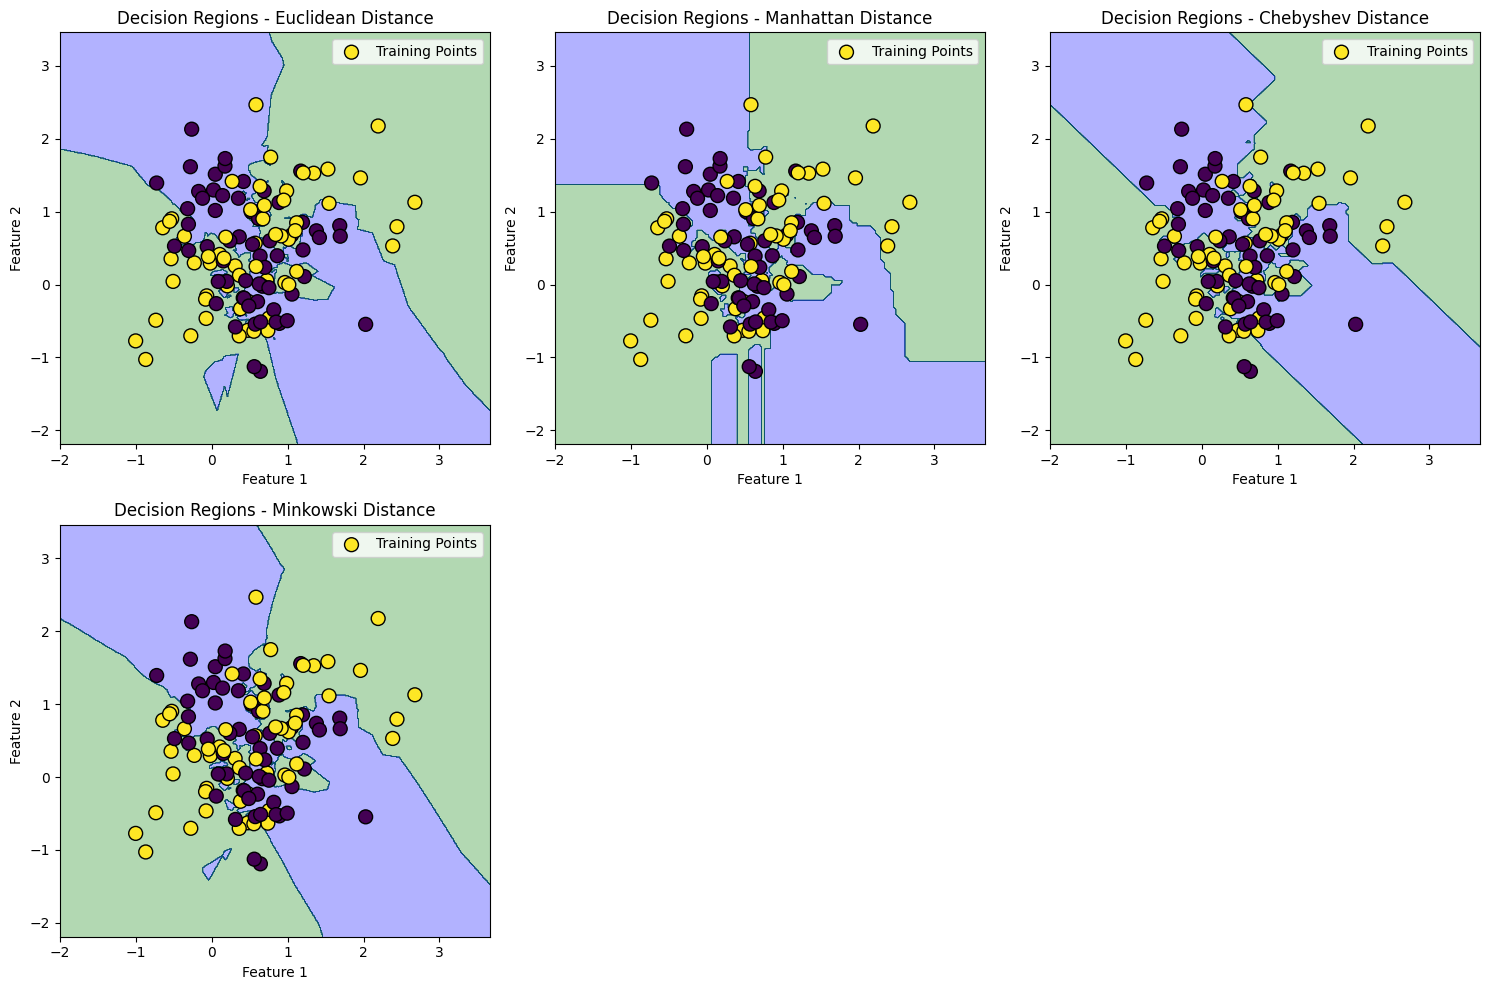

In [7]:
# Part(e): Influence of distance measure on KNN classifier

# Performance evaluation of KNN classifier with different distance measures
def kNNClassifyWithDistance(X_train, Y_train, X_test, k, distance_measure):
    predictions = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = 0
            if distance_measure == 'euclidean':
                dist = np.linalg.norm(X_test[i] - X_train[j])
            elif distance_measure == 'manhattan':
                dist = np.sum(np.abs(X_test[i] - X_train[j]))
            elif distance_measure == 'chebyshev':
                dist = np.max(np.abs(X_test[i] - X_train[j]))
            elif distance_measure == 'minkowski':
                p = 3
                dist = np.sum(np.abs(X_test[i] - X_train[j])**p)**(1/p)


            distances.append(dist)

        distances = np.array(distances)
        indexes = np.argsort(distances)[:k]

        class1 = np.sum(Y_train[indexes] == 1)
        class2 = np.sum(Y_train[indexes] == -1)

        if class1 > class2:
            final_class = 1
        else:
            final_class = -1

        predictions.append(final_class)

    return predictions

# Plot decision regions of KNN classifier with different distance measures
def plotDecisionRegions(X_train, Y_train, k, distance_measures):
    plt.figure(figsize=(15, 10))

    for i, distance_measure in enumerate(distance_measures):
        plt.subplot(2, 3, i + 1)

        a = np.arange(start=min(X_train[:, 0]) - 1,
                      stop=max(X_train[:, 0]) + 1, step=0.01)
        b = np.arange(start=min(X_train[:, 1]) - 1,
                      stop=max(X_train[:, 1]) + 1, step=0.01)
        XX, YY = np.meshgrid(a, b)
        input_array = np.array([XX.ravel(), YY.ravel()]).T

        predictions = np.array(kNNClassifyWithDistance(
            X_train, Y_train[:, 0], input_array, k, distance_measure))
        plt.contourf(XX, YY, predictions.reshape(XX.shape), colors=["blue", "green"], alpha=0.3)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train[:, 0], marker='o', edgecolor='k', s=100, label='Training Points')
        plt.title(f'Decision Regions - {distance_measure.capitalize()} Distance')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate performance with different distance measures
distance_measures = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_value = 5  # Choose an appropriate k value
plotDecisionRegions(X_train, Y_train, k_value, distance_measures)








### Part(e): Influence of distance measure on KNN classifier

#### Performance Evaluation of KNN Classifier with Different Distance Measures

#### Observations for different distance functions:

1. **Euclidean Distance:**
   - Decision regions are circular or spherical in shape.
   - Points within the same circle or sphere are assigned to the same class.
   - Sensitive to the overall distance between points.

2. **Manhattan (L1) Distance:**
   - Decision regions form square or rectangular shapes.
   - Boundaries follow the axes due to the sum of absolute differences along each dimension.
   - Effective when features have different scales.

3. **Chebyshev Distance:**
   - Decision regions are square and rotate along diagonals.
   - Boundaries are determined by the maximum absolute difference along any dimension.
   - Sensitive to outliers, influencing the shape of decision regions.

4. **Minkowski Distance:**
   - Decision regions vary based on the chosen value of 'p.'
   - For 'p=2' (Euclidean), regions are circular; for 'p=1' (Manhattan), regions are square.
   - Performance depends on the balance between Euclidean and Manhattan characteristics.


 **Overall Observations:**
- The choice of distance measure significantly influences the shape and orientation of decision regions.
- Understanding the characteristics of each distance metric helps interpret the resulting decision boundaries.
- Experimentation with various distance measures provides insights into the classifier's sensitivity to different aspects of the data.
- Adapt the distance metric based on the dataset's nature, emphasizing the trade-off between sensitivity to geometry and robustness to noise.


<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best value of k by cross validation and error function is  69
Accuracy by cross validation is is:  84.0
Accuracy on test data =  85.6


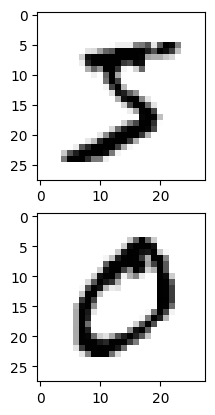

In [13]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

# images = images[:100]
# targets = targets[:100]
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

total_samples = len(images)

# print(Y_test_images)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1


num_train = int(train_ratio * total_samples)
num_val = int(val_ratio * total_samples)
num_test = total_samples - num_train - num_val

#following is sample data to run code faster

num_train = 3000
num_val = 1000
num_test = 1000

# Create training, validation, and test sets
X_train_images, Y_train_images = images[0:num_train], targets[0:num_train]
X_val_images, Y_val_images = images[num_train:num_train + num_val], targets[num_train:num_train + num_val]
X_test_images, Y_test_images = images[num_train + num_val: 5000], targets[num_train + num_val: 5000]


# For general case comment the code part from num_train = 3000 to the code line above this and uncomment the lines below
# X_train_images, Y_train_images = images[0:num_train], targets[0:num_train]
# X_val_images, Y_val_images = images[num_train:num_train + num_val], targets[num_train:num_train + num_val]
# X_test_images, Y_test_images = images[num_train + num_val: ], targets[num_train + num_val: ]





unique_values = np.unique(targets)
num_unique_values= len(unique_values)

#Write 'MultiClassKNNClassify' function


def MultiClasskNNClassify(X_train, Y_train, X_test, k, unique_values, distance_measure):
    predictions = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = 0
            if distance_measure == 'euclidean':
                dist = np.linalg.norm(X_test[i] - X_train[j])
            elif distance_measure == 'manhattan':
                dist = np.sum(np.abs(X_test[i] - X_train[j]))
            elif distance_measure == 'chebyshev':
                dist = np.max(np.abs(X_test[i] - X_train[j]))
            elif distance_measure == 'minkowski':
                p = 3
                dist = np.sum(np.abs(X_test[i] - X_train[j]) ** p) ** (1 / p)

            distances.append(dist)

        distances = np.array(distances)
        indexes = np.argsort(distances)[:k]
        classes_array = [0] * unique_values

        for idx in indexes:
            label = int(Y_train[idx])
            classes_array[label] += 1

        predicted_label = np.argmax(classes_array)
        predictions.append(predicted_label)

    return predictions


def MultiKNNAccuracy(true, pred):
    count = 0
    for i in range(len(pred)):
        if int(true[i]) == pred[i] :
            count += 1

    return count/len(true)



# #Empirically chose most suitable k and error function based on the evauation on cross-validation data
# k_values_f = [200, 400 , 600, 800, 1000, 1200] These values will be suited for dataset of 70k points
k_values_f = [69, 71, 73, 75, 77]
error_on_train_f = []
error_on_validate_f = []
error_functions = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k_best_final = []
val_accuracy_f = []
accuracy_array = []
for error in error_functions:
    for k in k_values_f:
        predictions = MultiClasskNNClassify(X_train_images, Y_train_images, X_val_images, k, 10, error)
        val_accuracy_f.append(MultiKNNAccuracy(Y_val_images, predictions))

    max_accuracy_index = np.argmax(val_accuracy_f)
    max_accuracy = val_accuracy_f[max_accuracy_index]
    val_accuracy_f = []
    accuracy_array.append(max_accuracy)
    k_best_f = k_values_f[max_accuracy_index]
    k_best_final.append(k_best_f)


max_among_error = np.argmax(accuracy_array)
k_best_mnist = k_best_final[max_among_error]
accuracy_mnist = accuracy_array[max_among_error]
best_error_function_f = error_functions[max_among_error]




print("Best value of k by cross validation and error function is ", k_best_mnist)
print("Accuracy by cross validation is is: ", 100*accuracy_mnist)


# Evaluate the performance on test data with the best hyperparameters obtained from cross-validation
test_predictions_f = MultiClasskNNClassify(X_train_images, Y_train_images, X_test_images, k_best_mnist,10, best_error_function_f)

test_accuracy_f = MultiKNNAccuracy(Y_test_images, test_predictions_f)

print("Accuracy on test data = ", 100*test_accuracy_f)



# #Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    num_classes = max(max(true), max(pred)) + 1
    conf_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for true, pred in zip(true, pred):
        conf_matrix[true, pred] += 1


    return conf_matrix



# #Suggest an alternative ways to improve performance




In [14]:
predictions_on_val = MultiClasskNNClassify(X_train_images, Y_train_images, X_val_images, k_best_mnist, 10, best_error_function_f)
matrix = compute_confusion_matrix(np.array(Y_val_images).astype(int),np.array(predictions_on_val).astype(int))
print(matrix)

[[ 90   0   0   1   0   0   2   1   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  2  16  72   0   2   0   0   4   2   0]
 [  0   7   0  82   2   1   0   1   1   3]
 [  0   4   0   0  90   0   1   0   0  10]
 [  1   6   0   4   1  62   1   1   0   0]
 [  3   5   1   0   1   1  88   0   0   0]
 [  0  14   0   0   2   0   0  87   0   1]
 [  1  17   0   7   3   0   0   1  75   8]
 [  1   4   1   1   8   0   1   5   0  89]]


## Alternate Ways to Improve Performance:

1. **Row-wise Averaging:**
   - Instead of performing 784 individual mathematical calculations for each pixel in an image during the comparison, consider using the average value of the entire row.
   - This approach reduces the computational load significantly, bringing down the number of calculations to 28 per image per comparison.
   - It can enhance the overall efficiency and speed of the KNN classifier, making it more suitable for large datasets.

2. **Pixel Value Scaling:**
   - Scale the pixel values to a standardized range, such as 0 to 1.
   - Normalizing pixel values ensures that all features have a similar scale, preventing certain features from dominating the distance calculations.
   - This can lead to improved convergence during the training process and enhance the overall performance of the KNN classifier.
3. **Feature Scaling:**
   - Ensure that all features are on similar scales. In addition to pixel values, other features derived from images or external sources should be scaled appropriately.
   - Feature scaling helps the algorithm give equal weight to all features, preventing certain features from dominating the distance measures.
   - It contributes to better model performance and more accurate predictions.

4. **Dimensionality Reduction:**
   - Utilizing dimensionality reduction techniques, such as Principal Component Analysis (PCA), to reduce the number of features while preserving essential information.
   - Reducing the dimensionality of the dataset can lead to faster computations and improved generalization on unseen data.

5. **Ensemble Methods:**
   - Employing ensemble methods, where multiple KNN classifiers are combined to make predictions can improve the performace..
   - Ensemble methods, such as bagging or boosting, can enhance the overall robustness and accuracy of the classifier.


<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data



### Observations
- Best Accuracy on synthetic test data generated from Gaussian distribution : 85.6
- Best Accuracy on MNIST validation and test data :  84.0

#### Confusion Matrix Observations:
The confusion matrix provides a detailed breakdown of the classifier's performance on the MNIST validation dataset. Each entry (i, j) in the matrix represents the count of instances where the true label was i and the predicted label was j. Here are key observations:

##### Diagonal Elements (True Positives):

- The diagonal elements represent the number of instances correctly classified for each digit. Higher values along the diagonal indicate accurate predictions.
- For instance, the value of 105 on the (2, 2) diagonal element suggests 105 instances of digit '1' correctly classified.

##### Off-diagonal Elements (Misclassifications):

- Off-diagonal elements indicate misclassifications. For instance, the (0, 7) element has a value of 2, suggesting 2 instances where true label '0' was misclassified as '7'.
- Analyzing off-diagonal elements helps identify which digits are commonly confused by the classifier.

##### Commonly Confused Digits:

- Based on the matrix, some instances of confusion include:
  - '1' and '2': 16 instances
  - '4' and '9': 10 instances
  - '5' and '9': 8 instances
- Understanding commonly confused digits is crucial for improving model performance.


##### Overall Model Evaluation:

- Overall, the confusion matrix indicates a good performance of the KNN classifier on the MNIST validation data, as evidenced by high diagonal values.